In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("Walmart_Sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit
0,1.0,05-02-2010,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83
1,1.0,12-02-2010,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06
2,NaN,19-02-2010,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39
3,1.0,26-02-2010,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99
4,1.0,05-03-2010,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df['date_year'] = df['Date'].dt.year
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year
2396,17.0,2012-03-02,856178.47,0.0,26.28,3.242,130.645793,6.0,53177.92087,2012
4973,35.0,2012-03-23,760671.10,0.0,57.30,3.900,141.626933,9.0,107704.77620,2012
1363,10.0,2011-07-22,1774342.61,0.0,88.59,3.697,129.150774,8.0,91240.87291,2011
4614,33.0,2010-10-29,213538.32,0.0,71.34,3.130,126.436419,9.0,101352.26560,2010
5579,40.0,2010-02-19,916289.20,0.0,27.84,2.747,131.637000,6.0,107669.75030,2010


In [5]:
df['date_month'] = df['Date'].dt.month
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month
1582,12.0,2010-04-09,1041238.87,0.0,59.25,3.090,126.601903,14.0,84583.38025,2010,4
1106,8.0,2012-02-10,1021400.42,1.0,35.71,3.409,223.802451,6.0,178759.60670,2012,2
2935,21.0,2011-07-15,728311.15,0.0,91.05,3.575,215.013443,8.0,159227.08880,2011,7
5802,41.0,2011-09-02,1283849.38,0.0,70.37,3.511,194.509211,7.0,140964.90220,2011,9
2232,16.0,2011-10-07,482926.93,0.0,48.91,3.498,194.945972,6.0,155424.63790,2011,10


In [6]:
df['date_day'] = df['Date'].dt.day
df.sample(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day
6126,43.0,2012-05-25,597406.39,0.0,82.41,3.561,213.173668,10.0,NaN,2012,5,25
1944,14.0,2011-09-23,1871555.64,0.0,63.75,3.711,187.029532,9.0,146690.36290,2011,9,23
6317,45.0,2010-07-30,716859.27,0.0,79.78,2.781,182.441538,9.0,NaN,2010,7,30
1850,13.0,2012-08-31,2073855.42,0.0,79.18,3.624,130.885355,6.0,88592.56966,2012,8,31
2795,20.0,2011-08-05,2189353.63,0.0,77.80,3.842,208.719238,7.0,90712.92084,2011,8,5


In [7]:
df['date_dow'] = df['Date'].dt.dayofweek
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4


In [8]:
df['date_is_weekend'] = np.where(df['date_dow'].isin([5,6]), 1,0)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,NaN,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [10]:
df.isnull().mean()*100

Store              0.714841
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       1.989122
Temperature        2.175602
Fuel_Price         0.932401
CPI                0.543901
Unemployment       3.387723
Profit             3.139083
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

In [11]:
# We decide that we remove data which is missing by less than 1%.

In [12]:
l = [col for col in df.columns if df[col].isnull().mean()<0.01 and df[col].isnull().mean()>0]
l

['Store', 'Fuel_Price', 'CPI']

In [13]:
# We do not do Complete Case Analysis on Fuel Price because a set of values or missing
l = l[2]

In [14]:
l

'CPI'

In [15]:
df.dropna(subset = l, inplace=True)

In [16]:
import pandas as pd


# Define arbitrary values for imputation
arbitrary_values = {'Store':-1}  # Define arbitrary values for each column

# Impute missing values with arbitrary values
for column, value in arbitrary_values.items():
    df[column].fillna(value, inplace=True)

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,2010-02-05,1643690.90,0.0,42.31,NaN,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,2010-02-12,1641957.44,1.0,38.51,NaN,211.242170,8.0,191792.06,2010,2,12,4,0
2,-1.0,2010-02-19,1611968.17,0.0,39.93,NaN,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,2010-02-26,1409727.59,0.0,46.63,NaN,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,2010-03-05,1554806.68,0.0,46.50,NaN,211.350143,8.0,166187.94,2010,3,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,2012-09-21,723086.20,0.0,65.32,NaN,191.856704,9.0,NaN,2012,9,21,4,0
6431,45.0,2012-10-05,733455.07,0.0,64.89,NaN,192.170412,9.0,NaN,2012,10,5,4,0
6432,45.0,2012-10-12,734464.36,0.0,54.47,NaN,192.327265,9.0,NaN,2012,10,12,4,0
6433,45.0,2012-10-19,718125.53,0.0,56.47,NaN,192.330854,9.0,NaN,2012,10,19,4,0


In [17]:
def random_sampling_imputation(column):
        non_missing_values = df[column].dropna()
        random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=True)
        df.loc[df[column].isnull(), column] = random_samples

In [18]:
random_sampling_imputation('Holiday_Flag')

In [19]:
df.isna().mean()*100

Store              0.000000
Date               0.000000
Weekly_Sales       0.000000
Holiday_Flag       0.000000
Temperature        2.109375
Fuel_Price         0.718750
CPI                0.000000
Unemployment       3.359375
Profit             3.000000
date_year          0.000000
date_month         0.000000
date_day           0.000000
date_dow           0.000000
date_is_weekend    0.000000
dtype: float64

Text(0.5, 1.0, 'Temperature')

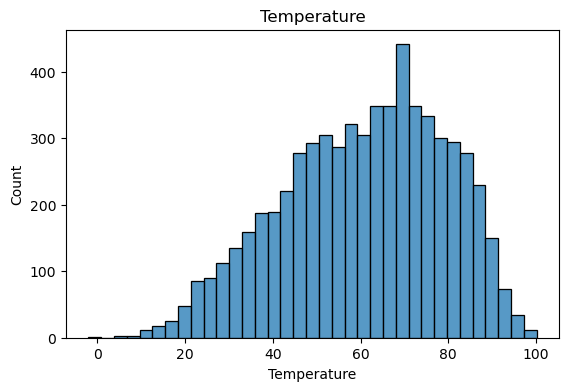

In [20]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Temperature'])
plt.title('Temperature')

In [21]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='median')

# Impute missing values in 'Temperature' column
df['Temperature'] = si.fit_transform(df[['Temperature']])

# Display the DataFrame after imputation
print(df)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31         NaN   
1       1.0 2010-02-12    1641957.44           1.0        38.51         NaN   
2      -1.0 2010-02-19    1611968.17           0.0        39.93         NaN   
3       1.0 2010-02-26    1409727.59           0.0        46.63         NaN   
4       1.0 2010-03-05    1554806.68           0.0        46.50         NaN   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32         NaN   
6431   45.0 2012-10-05     733455.07           0.0        64.89         NaN   
6432   45.0 2012-10-12     734464.36           0.0        54.47         NaN   
6433   45.0 2012-10-19     718125.53           0.0        56.47         NaN   
6434   45.0 2012-10-26     760281.43           0.0        58.85         NaN   

             CPI  Unemployment     Profit  date_yea

In [22]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price          46
CPI                  0
Unemployment       215
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [23]:
df["Fuel_Price"].fillna(df["Fuel_Price"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [24]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment       215
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Initialize SimpleImputer with median strategy
si = SimpleImputer(strategy='most_frequent')

# Impute missing values in 'Temperature' column
df['Unemployment'] = si.fit_transform(df[['Unemployment']])

# Display the DataFrame after imputation
print(df)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [26]:
df.isna().sum()

Store                0
Date                 0
Weekly_Sales         0
Holiday_Flag         0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
Profit             192
date_year            0
date_month           0
date_day             0
date_dow             0
date_is_weekend      0
dtype: int64

In [27]:
df["Profit"].fillna(df["Profit"].max(), inplace=True)
print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       1.0 2010-02-05    1643690.90           0.0        42.31       4.468   
1       1.0 2010-02-12    1641957.44           1.0        38.51       4.468   
2      -1.0 2010-02-19    1611968.17           0.0        39.93       4.468   
3       1.0 2010-02-26    1409727.59           0.0        46.63       4.468   
4       1.0 2010-03-05    1554806.68           0.0        46.50       4.468   
...     ...        ...           ...           ...          ...         ...   
6429   45.0 2012-09-21     723086.20           0.0        65.32       4.468   
6431   45.0 2012-10-05     733455.07           0.0        64.89       4.468   
6432   45.0 2012-10-12     734464.36           0.0        54.47       4.468   
6433   45.0 2012-10-19     718125.53           0.0        56.47       4.468   
6434   45.0 2012-10-26     760281.43           0.0        58.85       4.468   

             CPI  Unemployment     Profit  date_yea

In [28]:
df.isna().sum()

Store              0
Date               0
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
Profit             0
date_year          0
date_month         0
date_day           0
date_dow           0
date_is_weekend    0
dtype: int64

In [29]:
df = df.drop('Date', axis=1)

In [30]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Profit,date_year,date_month,date_day,date_dow,date_is_weekend
0,1.0,1643690.90,0.0,42.31,4.468,211.096358,8.0,192261.83,2010,2,5,4,0
1,1.0,1641957.44,1.0,38.51,4.468,211.242170,8.0,191792.06,2010,2,12,4,0
2,-1.0,1611968.17,0.0,39.93,4.468,211.289143,8.0,191050.39,2010,2,19,4,0
3,1.0,1409727.59,0.0,46.63,4.468,211.319643,8.0,182901.99,2010,2,26,4,0
4,1.0,1554806.68,0.0,46.50,4.468,211.350143,8.0,166187.94,2010,3,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6429,45.0,723086.20,0.0,65.32,4.468,191.856704,9.0,476485.43,2012,9,21,4,0
6431,45.0,733455.07,0.0,64.89,4.468,192.170412,9.0,476485.43,2012,10,5,4,0
6432,45.0,734464.36,0.0,54.47,4.468,192.327265,9.0,476485.43,2012,10,12,4,0
6433,45.0,718125.53,0.0,56.47,4.468,192.330854,9.0,476485.43,2012,10,19,4,0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.673346,1.052559,-0.273363,-1.015045,2.359467,1.000906,-0.001963,0.726122,-1.210304,-1.373879,-1.219241,0.0,0.0
1,-1.673346,1.049486,3.658145,-1.223512,2.359467,1.004610,-0.001963,0.720249,-1.210304,-1.373879,-0.419961,0.0,0.0
2,-1.826912,0.996325,-0.273363,-1.145611,2.359467,1.005803,-0.001963,0.710978,-1.210304,-1.373879,0.379319,0.0,0.0
3,-1.673346,0.637820,-0.273363,-0.778050,2.359467,1.006578,-0.001963,0.609118,-1.210304,-1.373879,1.178599,0.0,0.0
4,-1.673346,0.894997,-0.273363,-0.785182,2.359467,1.007352,-0.001963,0.400182,-1.210304,-1.065153,-1.219241,0.0,0.0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=[1],axis=1),df[1],test_size=0.3,random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)

print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('R2 Score',r2_score(y_test,y_pred))

MAE 0.7631750856730487
MSE 0.8500632119423442
R2 Score 0.1590489448892608


In [35]:
residual = y_test - y_pred

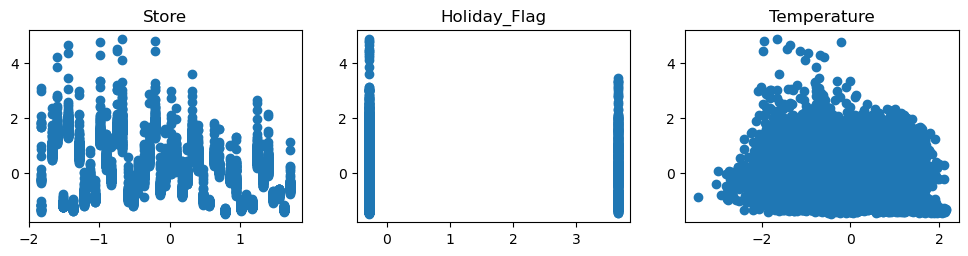

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df[0],df[1])
ax1.set_title("Store")
ax2.scatter(df[2],df[1])
ax2.set_title("Holiday_Flag")
ax3.scatter(df[3],df[1])
ax3.set_title("Temperature")

plt.show()

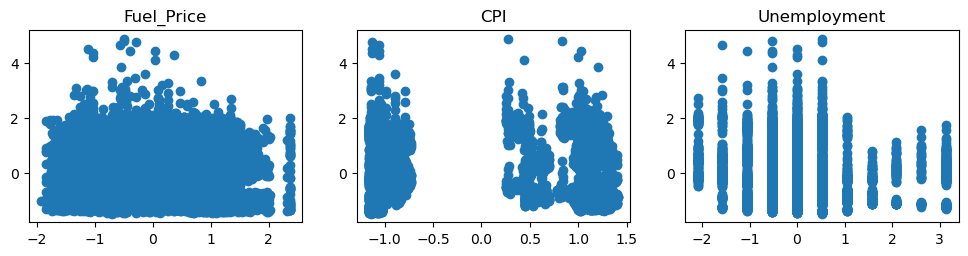

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df[4],df[1])
ax1.set_title("Fuel_Price")
ax2.scatter(df[5],df[1])
ax2.set_title("CPI")
ax3.scatter(df[6],df[1])
ax3.set_title("Unemployment")

plt.show()

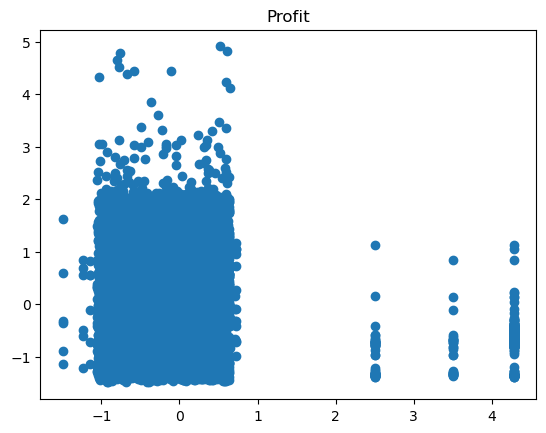

In [39]:
plt.scatter(df[7],df[1])
plt.title("Profit")
plt.show()

<AxesSubplot:>

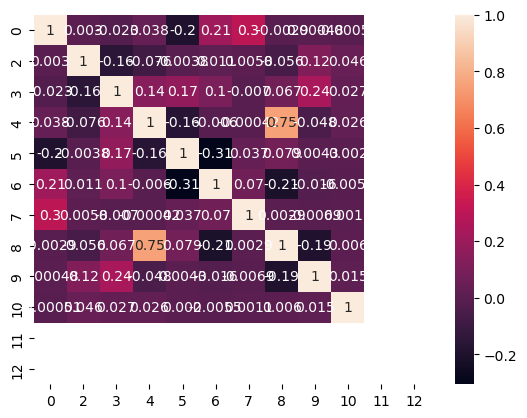

In [42]:
import seaborn as sns
sns.heatmap(df.drop(columns=[1],axis=1).corr(),annot=True)

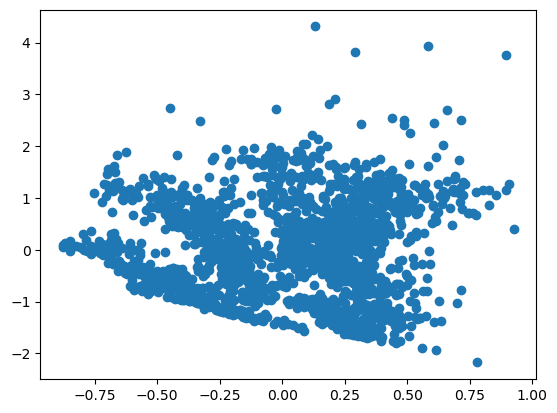

In [43]:
plt.scatter(y_pred,residual)

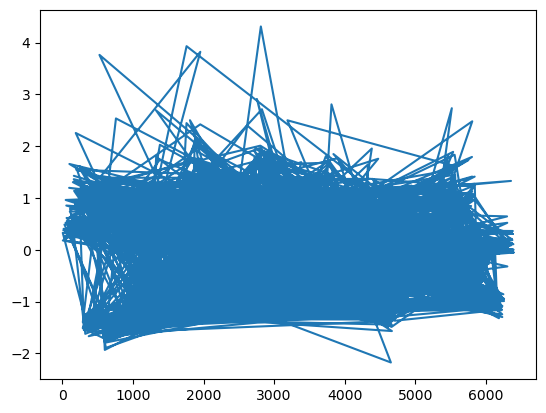

In [44]:
plt.plot(residual) 